# Tutorial Penyelesaian Masalah dengan Fuzzy Logic

In [ ]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bengkel = pd.read_excel("https://github.com/khalilullahalfaath/tubes02AI/blob/main/bengkel.xlsx?raw=true")
bengkel

,id,servis,harga
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


# Menentukan Fungsi Membership

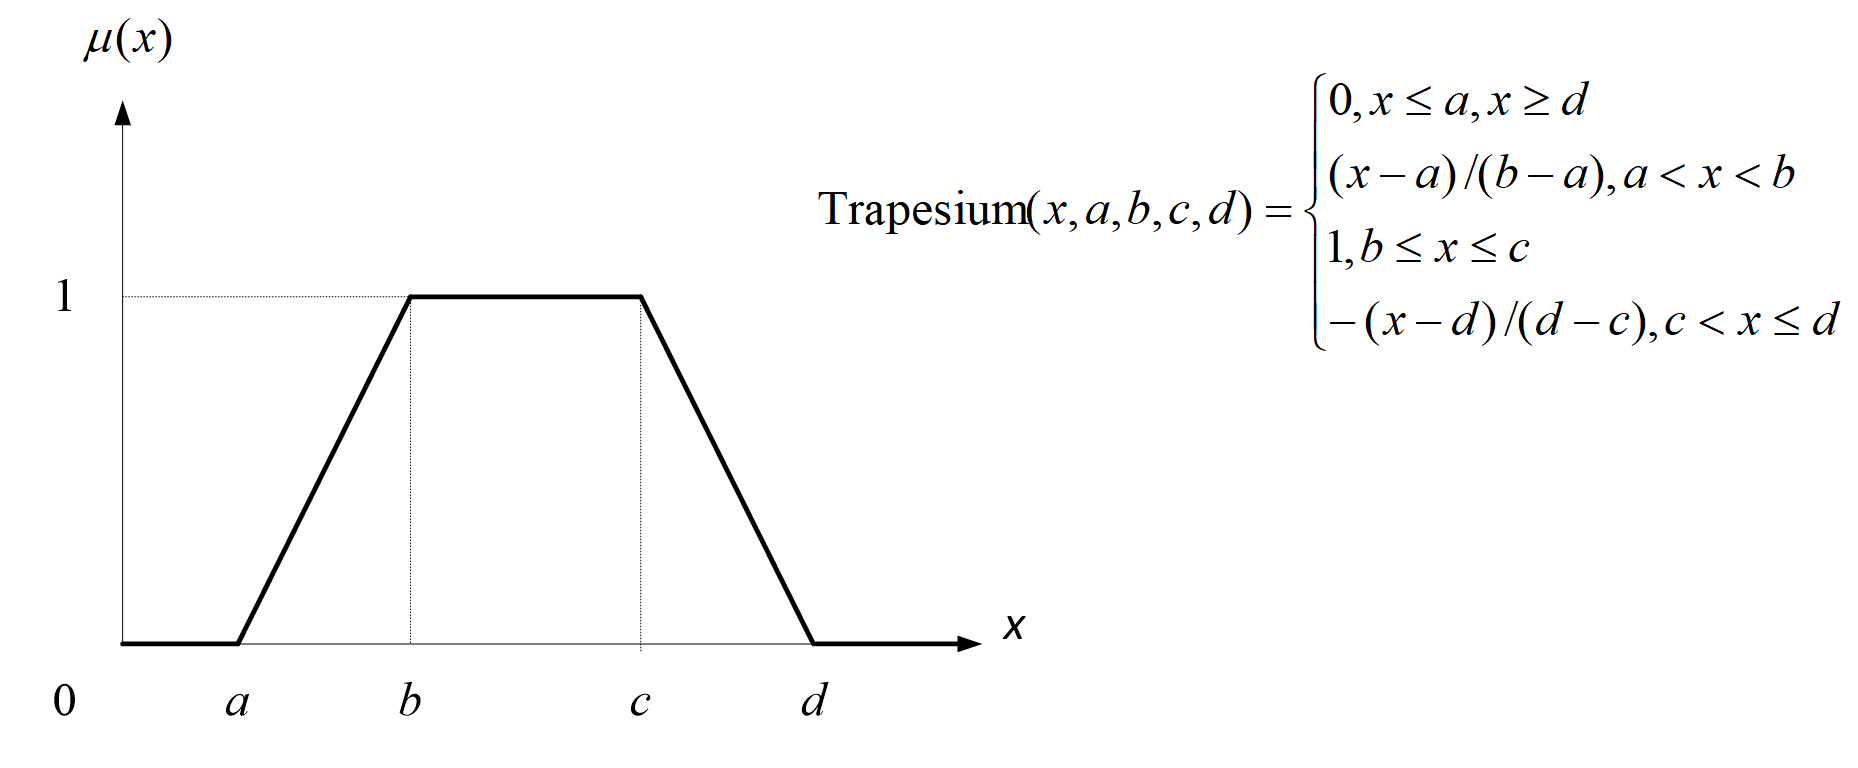

### Fungsi Membership Kualitas Servis 

Misalkan nilai kualitas servis untuk sebuah bengkel adalah x, maka fungsi membership x adalah
*   Jika x ≤ 20 maka kualitas servis bengkel tersebut diartikan sangat jelek
*   Jika 30 ≤ x ≤ 40 maka kualitas servis bengkel tersebut diartikan jelek
*   Jika 50 ≤ x ≤ 65 maka kualitas servis bengkel tersebut diartikan biasa
*   Jika 75 ≤ x ≤ 85 maka kualitas servis bengkel tersebut diartikan bagus
*   Jika 90 ≤ x ≤ 100 maka kualitas servis bengkel tersebut diartikan sangat bagus






In [ ]:
# fungsi membership kualitas servis
def membershipKualitasServis(x):
  kualitasServis = {"Sangat Jelek": 0, "Jelek": 0,"Biasa": 0,"Bagus": 0,"Sangat Bagus": 0}

  a,b,c,d,e,f,g,h,i = 20,30,40,50,65,75,85,90,100

  # garis datar
  if x <= a:
    kualitasServis["Sangat Jelek"] = 1
  if x >= b and x <= c:
    kualitasServis["Jelek"] = 1
  if x >= d and x <= e:
    kualitasServis["Biasa"] = 1
  if x >= f and x <= g:
    kualitasServis["Bagus"] = 1
  if x >= h and x <= i:
    kualitasServis["Sangat Bagus"] = 1

  # garis miring
  if x > a and x <= b:
    kualitasServis["Sangat Jelek"] = -(x - b) / (b - a)
  if x > a and x < b:
    kualitasServis["Jelek"] = (x - a) / (b - a)
  if x > c and x <= d:
    kualitasServis["Jelek"] = -(x - d) / (d - c)
  if x > c and x < d:
    kualitasServis["Biasa"] = (x - c) / (d - c)  
  if x > e and x <= f:
    kualitasServis["Biasa"] = -(x - f) / (f - e)
  if x > e and x < f:
    kualitasServis["Bagus"] = (x - e) / (f - e) 
  if x > g and x <= h:
    kualitasServis["Bagus"] = -(x - h) / (h - g)
  if x > g and x < h:
    kualitasServis["Sangat Bagus"] = (x - g) / (h - g) 
  
  return kualitasServis

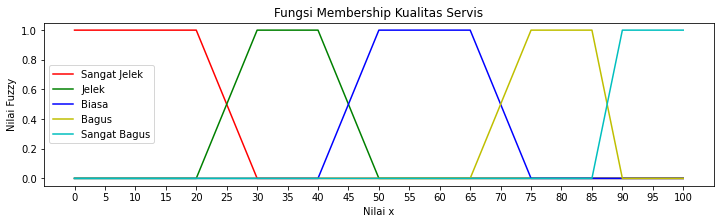

In [ ]:
# Diagram nilai kualitas servis
plt.figure(figsize=(12,3))
plt.title("Fungsi Membership Kualitas Servis")

plt.plot(range(101),[membershipKualitasServis(x)["Sangat Jelek"] for x in range(101)], "r")
plt.plot(range(101),[membershipKualitasServis(x)["Jelek"] for x in range(101)], "g")
plt.plot(range(101),[membershipKualitasServis(x)["Biasa"] for x in range(101)], "b")
plt.plot(range(101),[membershipKualitasServis(x)["Bagus"] for x in range(101)], "y")
plt.plot(range(101),[membershipKualitasServis(x)["Sangat Bagus"] for x in range(101)], "c")

plt.plot(0, 0, "r", linewidth = 1.5, label = "Sangat Jelek")
plt.plot(0, 0, "g", linewidth = 1.5, label = "Jelek")
plt.plot(0, 0, "b", linewidth = 1.5, label = "Biasa")
plt.plot(0, 0, "y", linewidth = 1.5, label = "Bagus")
plt.plot(0, 0, "c", linewidth = 1.5, label = "Sangat Bagus")

plt.xticks(np.arange(0, 105, 5.0))
plt.xlabel("Nilai x")
plt.ylabel("Nilai Fuzzy")
plt.legend()
plt.show()



## Fungsi Membership Harga
Misalkan nilai harga untuk sebuah bengkel adalah y, maka fungsi membership y adalah
*   Jika y ≤ 3 maka harga pelayanan bengkel tersebut diartikan murah
*   Jika 5 ≤ y ≤ 6 maka harga pelayanan bengkel tersebut diartikan sedang
*   Jika 9 ≤ y ≤10 maka harga pelayanan bengkel tersebut diartikan mahal




In [ ]:
# fungsi membership harga
def membershipHarga(x):
  harga = {"Murah": 0,"Sedang": 0,"Mahal": 0}

  a,b,c,d,e = 3,5,6,9,10

  # garis datar
  if x <= a:
    harga["Murah"] = 1
  if x >= b and x <= c:
    harga["Sedang"] = 1
  if x >= d and x <= e:
    harga["Mahal"] = 1

  # garis miring
  if x > a and x <= b:
    harga["Murah"] = -(x - b) / (b - a)
  if x > a and x < b:
    harga["Sedang"] = (x - a) / (b - a)
  if x > c and x <= d:
    harga["Sedang"] = -(x - d) / (d - c)
  if x > c and x < d:
    harga["Mahal"] = (x - c) / (d - c)  
  
  return harga

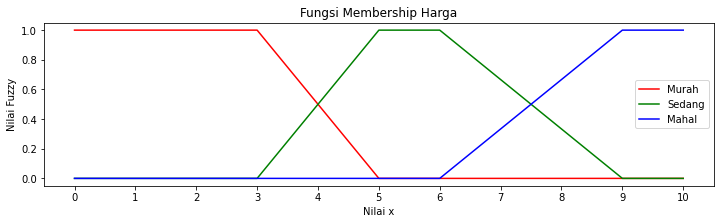

In [ ]:
# Diagram nilai harga
plt.figure(figsize=(12,3))
plt.title("Fungsi Membership Harga")

plt.plot(range(11),[membershipHarga(x)["Murah"] for x in range(11)], "r")
plt.plot(range(11),[membershipHarga(x)["Sedang"] for x in range(11)], "g")
plt.plot(range(11),[membershipHarga(x)["Mahal"] for x in range(11)], "b")

plt.plot(0, 0, "r", linewidth = 1.5, label = "Murah")
plt.plot(0, 0, "g", linewidth = 1.5, label = "Sedang")
plt.plot(0, 0, "b", linewidth = 1.5, label = "Mahal")

plt.xticks(list(range(11)))
plt.xlabel("Nilai x")
plt.ylabel("Nilai Fuzzy")
plt.legend()
plt.show()

# Proses Fuzzifikasi


In [ ]:
kumpulanNilaiFuzzy = []

for kualitasServis, harga in zip(bengkel["servis"], bengkel['harga']):
  nilaiFuzzy = {"Kualitas Servis ": 0, "Harga": 0, "Nilai Fuzzy Kualitas Servis": 0, "Nilai Fuzzy Harga": 0}

  nilaiFuzzy["Kualitas Servis"] = kualitasServis
  nilaiFuzzy["Harga"] = harga
  nilaiFuzzy["Nilai Fuzzy Kualitas Servis"] = membershipKualitasServis(kualitasServis)
  nilaiFuzzy["Nilai Fuzzy Harga"] = membershipHarga(harga)

  kumpulanNilaiFuzzy.append(nilaiFuzzy)

## Contoh Hasil Fuzzifikasi

In [ ]:
import random
print("Contoh Hasil Fuzzifikasi: \n")
for i in range(5):
  i = random.randint(0,100)
  print("Kualitas Servis: ", kumpulanNilaiFuzzy[i]["Kualitas Servis"])
  print("Harga: ", kumpulanNilaiFuzzy[i]["Harga"])
  print("Nilai Kualitas Servis: ", kumpulanNilaiFuzzy[i]["Nilai Fuzzy Kualitas Servis"])
  print("Nilai Harga: ", kumpulanNilaiFuzzy[i]["Nilai Fuzzy Harga"], end = "\n\n")

Contoh Hasil Fuzzifikasi: 

Kualitas Servis:  24
Harga:  3
Nilai Kualitas Servis:  {'Sangat Jelek': 0.6, 'Jelek': 0.4, 'Biasa': 0, 'Bagus': 0, 'Sangat Bagus': 0}
Nilai Harga:  {'Murah': 1, 'Sedang': 0, 'Mahal': 0}

Kualitas Servis:  27
Harga:  10
Nilai Kualitas Servis:  {'Sangat Jelek': 0.3, 'Jelek': 0.7, 'Biasa': 0, 'Bagus': 0, 'Sangat Bagus': 0}
Nilai Harga:  {'Murah': 0, 'Sedang': 0, 'Mahal': 1}

Kualitas Servis:  78
Harga:  7
Nilai Kualitas Servis:  {'Sangat Jelek': 0, 'Jelek': 0, 'Biasa': 0, 'Bagus': 1, 'Sangat Bagus': 0}
Nilai Harga:  {'Murah': 0, 'Sedang': 0.6666666666666666, 'Mahal': 0.3333333333333333}

Kualitas Servis:  31
Harga:  4
Nilai Kualitas Servis:  {'Sangat Jelek': 0, 'Jelek': 1, 'Biasa': 0, 'Bagus': 0, 'Sangat Bagus': 0}
Nilai Harga:  {'Murah': 0.5, 'Sedang': 0.5, 'Mahal': 0}

Kualitas Servis:  20
Harga:  1
Nilai Kualitas Servis:  {'Sangat Jelek': 1, 'Jelek': 0, 'Biasa': 0, 'Bagus': 0, 'Sangat Bagus': 0}
Nilai Harga:  {'Murah': 1, 'Sedang': 0, 'Mahal': 0}



# **Inteferensi**

**Fuzzy Set Rules (Konjungsi)**

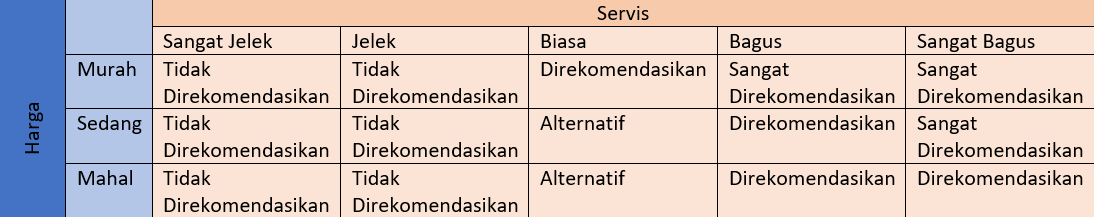

In [ ]:
#Untuk setiap rules merupakan Konjungsi.
#Contoh: IF Harga = Murah (1) ^ Servis = Sangat Jelek (1) THEN Status = Tidak Direkomendasikan

fuzzySetRules = {
    ('Murah', 'Sangat Jelek') : 'Tidak Direkomendasikan',
    ('Sedang', 'Sangat Jelek') : 'Tidak Direkomendasikan',
    ('Mahal', 'Sangat Jelek'): 'Tidak Direkomendasikan',
    ('Murah', 'Jelek'): 'Tidak Direkomendasikan',
    ('Sedang', 'Jelek'): 'Tidak Direkomendasikan',
    ('Mahal', 'Jelek'): 'Tidak Direkomendasikan',
    ('Murah', 'Biasa'): 'Direkomendasikan',
    ('Sedang', 'Biasa'): 'Alternatif',
    ('Mahal', 'Biasa'): 'Alternatif',
    ('Murah', 'Bagus'): 'Sangat Direkomendasikan',
    ('Sedang', 'Bagus'): 'Direkomendasikan',
    ('Mahal', 'Bagus'): 'Direkomendasikan',
    ('Murah', 'Sangat Bagus'): 'Sangat Direkomendasikan',
    ('Sedang', 'Sangat Bagus'): 'Sangat Direkomendasikan',
    ('Mahal', 'Sangat Bagus'): 'Direkomendasikan',
}

## Proses Inferensi

In [ ]:
hasilInterefence = []

def interefence(fuzzed):
    result = {'Nilai Fuzzy':0, 'Tidak Direkomendasikan': 0, 'Alternatif': 0, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}

    for Servis in fuzzed['Nilai Fuzzy Kualitas Servis'].keys():
        for Harga in fuzzed['Nilai Fuzzy Harga'].keys():
            result["Nilai Fuzzy"] = {"Kualitas Servis": fuzzed["Kualitas Servis"], "Harga": fuzzed["Harga"]}
            minValue = min(fuzzed['Nilai Fuzzy Harga'][Harga], fuzzed['Nilai Fuzzy Kualitas Servis'][Servis])

            #Proses Konjungsi sesuai fuzzy set rules
            output = fuzzySetRules[(Harga, Servis)]

            if minValue > result[output]:
                result[output] = minValue

    return result

for fuzzed in kumpulanNilaiFuzzy:
    hasilInterefence.append(interefence(fuzzed))

### Contoh Hasil Inferensi 

In [ ]:
print("Contoh Hasil Inteferensi :\n")
for i in range(5):
    print(hasilInterefence[i])

Contoh Hasil Inteferensi :

{'Nilai Fuzzy': {'Kualitas Servis': 58, 'Harga': 7}, 'Tidak Direkomendasikan': 0, 'Alternatif': 0.6666666666666666, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Nilai Fuzzy': {'Kualitas Servis': 54, 'Harga': 1}, 'Tidak Direkomendasikan': 0, 'Alternatif': 0, 'Direkomendasikan': 1, 'Sangat Direkomendasikan': 0}
{'Nilai Fuzzy': {'Kualitas Servis': 98, 'Harga': 2}, 'Tidak Direkomendasikan': 0, 'Alternatif': 0, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 1}
{'Nilai Fuzzy': {'Kualitas Servis': 52, 'Harga': 4}, 'Tidak Direkomendasikan': 0, 'Alternatif': 0.5, 'Direkomendasikan': 0.5, 'Sangat Direkomendasikan': 0}
{'Nilai Fuzzy': {'Kualitas Servis': 11, 'Harga': 4}, 'Tidak Direkomendasikan': 0.5, 'Alternatif': 0, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}


# Defuzzifikasi

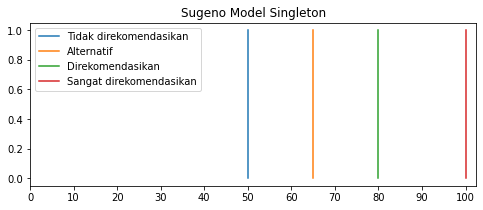

In [ ]:
plt.figure(figsize=(8,3))
plt.title("Sugeno Model Singleton")

plt.plot([50, 50], [0,1], label = "Tidak direkomendasikan")
plt.plot([65, 65], [0,1], label = "Alternatif")
plt.plot([80, 80], [0,1], label = "Direkomendasikan")
plt.plot([100, 100], [0,1], label = "Sangat direkomendasikan")
plt.xticks(np.arange(0, 110, 10.0))
plt.legend()
plt.show()

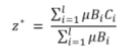

In [ ]:
deffuzy = {'Tidak Direkomendasikan': 50, "Alternatif": 65, "Direkomendasikan": 80, "Sangat Direkomendasikan": 100}

def defuzzification(inference, deffuzy):
    numerator, denominator = 0, 0
    
    for output in deffuzy.keys():
        numerator += inference[output] * deffuzy[output]
        denominator += inference[output]
        
    return numerator/denominator

hasilAkhir = []

for inference in hasilInterefence:
    hasilAkhir.append(defuzzification(inference, deffuzy))

## Contoh Hasil Defuzifikasi

In [ ]:
print("Contoh Hasil Defuzifikasi:\n")
for i in range(0, 40, 5):
    print(f'Data Ke-{i+1} = {hasilAkhir[i]}')

Contoh Hasil Defuzifikasi:

Data Ke-1 = 65.0
Data Ke-6 = 65.0
Data Ke-11 = 50.0
Data Ke-16 = 80.0
Data Ke-21 = 74.0
Data Ke-26 = 50.0
Data Ke-31 = 78.5
Data Ke-36 = 50.0


# Output Akhir


In [ ]:
bengkel['result'] = hasilAkhir
bengkel = bengkel.sort_values(by='result', ascending=False)[:10]

bengkel['id'].to_excel('peringkat.xls', index=False, header=False)  
bengkel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  after removing the cwd from sys.path.


,id,servis,harga,result
2,3,98,2,100.0
51,52,94,3,100.0
33,34,93,4,100.0
91,92,83,3,100.0
90,91,98,3,100.0
12,13,80,3,100.0
16,17,70,3,90.0
43,44,63,2,80.0
14,15,78,5,80.0
41,42,94,10,80.0
